In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [3]:
Station = Base.classes.stations
Measurement = Base.classes.measurements

In [4]:
session = Session(engine)

In [5]:
one_year_ago = dt.date.today()-dt.timedelta(365)
one_year_ago

datetime.date(2017, 5, 6)

In [6]:
results = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date >= one_year_ago).group_by(Measurement.date).all()
results

[(0.0, '2017-05-06'),
 (0.03, '2017-05-07'),
 (1.11, '2017-05-08'),
 (0.23, '2017-05-09'),
 (0.55, '2017-05-10'),
 (0.44, '2017-05-11'),
 (0.1, '2017-05-12'),
 (0.1, '2017-05-13'),
 (1.0, '2017-05-14'),
 (0.6, '2017-05-15'),
 (0.3, '2017-05-16'),
 (0.06, '2017-05-17'),
 (0.0, '2017-05-18'),
 (0.01, '2017-05-19'),
 (None, '2017-05-20'),
 (0.0, '2017-05-21'),
 (0.3, '2017-05-22'),
 (0.44, '2017-05-23'),
 (2.17, '2017-05-24'),
 (0.88, '2017-05-25'),
 (0.0, '2017-05-26'),
 (0.5, '2017-05-27'),
 (0.0, '2017-05-28'),
 (0.4, '2017-05-29'),
 (None, '2017-05-30'),
 (0.25, '2017-05-31'),
 (0.01, '2017-06-01'),
 (0.09, '2017-06-02'),
 (None, '2017-06-03'),
 (0.82, '2017-06-04'),
 (0.01, '2017-06-05'),
 (0.0, '2017-06-06'),
 (0.01, '2017-06-07'),
 (0.0, '2017-06-08'),
 (0.02, '2017-06-09'),
 (None, '2017-06-10'),
 (0.7, '2017-06-11'),
 (0.81, '2017-06-12'),
 (0.65, '2017-06-13'),
 (0.81, '2017-06-14'),
 (1.69, '2017-06-15'),
 (0.1, '2017-06-16'),
 (0.1, '2017-06-17'),
 (0.7, '2017-06-18'),
 (0.4, 

In [7]:
df = pd.DataFrame(results, columns=['precipitation', "date"])
df.set_index(df['date'], inplace=True)

In [8]:
df

,precipitation,date
date,,
2017-05-06,0.00,2017-05-06
2017-05-07,0.03,2017-05-07
2017-05-08,1.11,2017-05-08
2017-05-09,0.23,2017-05-09
2017-05-10,0.55,2017-05-10
2017-05-11,0.44,2017-05-11
2017-05-12,0.10,2017-05-12
2017-05-13,0.10,2017-05-13
2017-05-14,1.00,2017-05-14


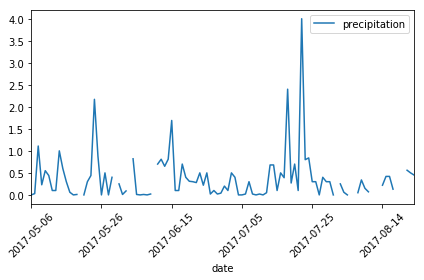

In [9]:
df.plot(x_compat=True)

# Rotate the xticks for the dates
plt.xticks(rotation='45')
plt.tight_layout()
plt.show()

In [10]:
total_stations = session.query(Station.station).count()
total_stations

9

In [11]:
active = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [12]:
most_active = active[0]
most_active

('USC00519281', 2772)

In [13]:
tobs = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date >= one_year_ago).all()

In [14]:
tobs_df = pd.DataFrame(tobs)
tobs_df.head()

,tobs
0,79.0
1,75.0
2,70.0
3,67.0
4,74.0


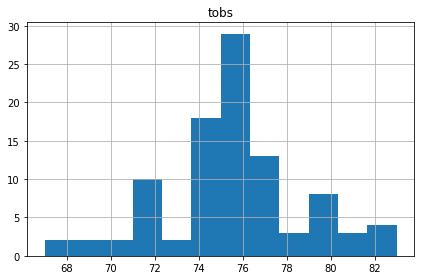

In [15]:
tobs_df.hist(bins=12)
plt.tight_layout()
plt.show()

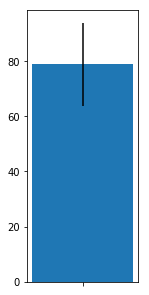

In [16]:
def calc_temps(start_date, end_date):
    trip_dates = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= start_date, Measurement.date <= end_date).all()
    trip_dates_df = pd.DataFrame(trip_dates)
    max_temp = trip_dates_df["tobs"].max()
    min_temp = trip_dates_df["tobs"].min()
    mean_temp = trip_dates_df["tobs"].mean()
    plt.figure(figsize=(2,5))
    plt.bar(1,mean_temp, yerr= max_temp - min_temp, tick_label="")
    plt.show()
calc_temps("2017-08-03", "2017-08-19")